In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [29]:
g0 = 2*np.pi * 100
rabi = 2*np.pi * 100
# delta = 2*np.pi * 0
kappa = 2*np.pi * 0.3
gamma = 2*np.pi * 10000

In [30]:
# define basis:
BASIS_SIZE = 5

g_ket = basis(BASIS_SIZE, 0)
u_ket = basis(BASIS_SIZE, 1)
x_ket = basis(BASIS_SIZE, 2)
a_ket = basis(BASIS_SIZE, 3)
b_ket = basis(BASIS_SIZE, 4)

g_bra = g_ket.dag()
u_bra = u_ket.dag()
x_bra = x_ket.dag()
a_bra = a_ket.dag()
b_bra = b_ket.dag()

g_id = g_ket*g_bra
u_id = u_ket*u_bra
x_id = x_ket*x_bra
a_id = a_ket*a_bra
b_id = b_ket*b_bra

H = -g0*(g_ket*x_bra + x_ket*g_bra) - rabi/2*(u_ket*x_bra + x_ket*u_bra)
c_ops = [np.sqrt(kappa/2)*(a_ket*g_bra), np.sqrt(gamma/2)*(b_ket*x_bra)]

In [31]:
psi0 = 2*g0*u_ket - rabi*g_ket
psi0 /= psi0.norm()

In [48]:
time = np.linspace(0, 10, 100001)

In [49]:
result = mesolve(H, psi0, time, c_ops)

In [50]:
real_eff = expect(a_id, result.states)
anal_eff = [expect(g_id,state)/(expect(g_id,state)+gamma/kappa*expect(x_id,state)) for state in result.states]

C=g0**2/(2*kappa*gamma)
bench = [2*C/(2*C+1) for t in time]

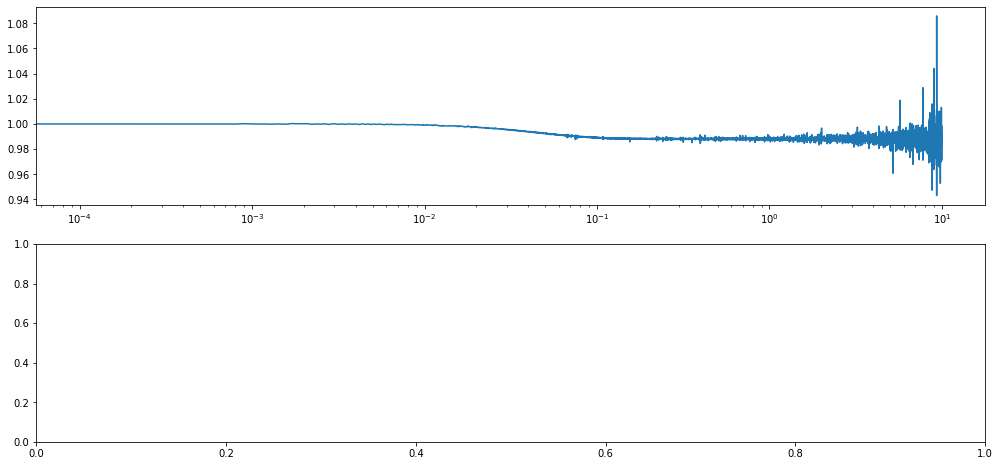

In [54]:
fig, [ax1, ax2] = plt.subplots(2,1)
# ax1.plot(time, real_eff, 'k')
ax1.plot(time, anal_eff)
# ax1.plot(time, bench, 'r--')
ax1.set_xscale('log')



fig.set_size_inches(17,8)

In [47]:
state = result.states[-6]

print(expect(g_id,state)/(expect(g_id,state)+gamma/kappa*expect(x_id,state)))

0.9872484778463794
